In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
# plt.style.use('dark_background')
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

In [4]:
train_directory = '/home/tsaileshkumar/ML_Project/dataset_1'
# test_directory = '/home/tsaileshkumar/ML_Project/dataset/test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,  
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
) 

train_generator = train_datagen.flow_from_directory(
train_directory, 
target_size=(224,224), 
color_mode='rgb', 
batch_size=32, 
class_mode='binary', 
subset='training',
shuffle=True,
seed=42
)
validation_generator = val_datagen.flow_from_directory(
train_directory,
target_size=(224,224), 
color_mode='rgb', 
batch_size=32, 
class_mode='binary', 
subset='validation', 
shuffle=False
)

Found 267 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [38]:
# from tensorflow.keras.applications import ResNet50


# # Initialize the Pretrained Model
# feature_extractor = ResNet50(weights='imagenet', 
#                              input_shape=(224, 224, 3),
#                              include_top=False)

# # Set this parameter to make sure it's not being trained
# feature_extractor.trainable = False

# # Set the input layer
# input_ = tf.keras.Input(shape=(224, 224, 3))

# # Set the feature extractor layer
# x = feature_extractor(input_, training=False)

# # Set the pooling layer
# x = tf.keras.layers.GlobalAveragePooling2D()(x)

# # Set the final layer with sigmoid activation function
# output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# # Create the new model object
# model = tf.keras.Model(input_, output_)

# # optimizer = tf.keras.optimizers.Adam(learning_rate=10E-6)
# optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.03,
#                                      initial_accumulator_value=0.1,
#                                      epsilon=1e-07)

# # Compile it
# model.compile(optimizer,
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

# # Print The Summary of The Model
# model.summary()

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model


vgg = VGG16(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
 layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(1, activation = 'sigmoid')(x) 
model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}

In [8]:
history_of_model = model.fit(train_generator, epochs=20, validation_data=validation_generator,class_weight=class_weights)

Epoch 1/20
9/9 [==============================] - 72s 7s/step - loss: 1.1151 - accuracy: 0.7416 - val_loss: 0.9446 - val_accuracy: 0.8000
Epoch 2/20
9/9 [==============================] - 52s 4s/step - loss: 0.3795 - accuracy: 0.9101 - val_loss: 1.2725 - val_accuracy: 0.8000
Epoch 3/20
9/9 [==============================] - 36s 4s/step - loss: 0.3151 - accuracy: 0.9026 - val_loss: 0.9772 - val_accuracy: 0.8154
Epoch 4/20
9/9 [==============================] - 38s 4s/step - loss: 0.1968 - accuracy: 0.9438 - val_loss: 0.9057 - val_accuracy: 0.7846
Epoch 5/20
9/9 [==============================] - 38s 4s/step - loss: 0.2509 - accuracy: 0.9101 - val_loss: 0.9199 - val_accuracy: 0.8615
Epoch 6/20
9/9 [==============================] - 35s 4s/step - loss: 0.1372 - accuracy: 0.9625 - val_loss: 0.9945 - val_accuracy: 0.7538
Epoch 7/20
9/9 [==============================] - 36s 4s/step - loss: 0.1688 - accuracy: 0.9438 - val_loss: 0.7959 - val_accuracy: 0.8615
Epoch 8/20
9/9 [==================

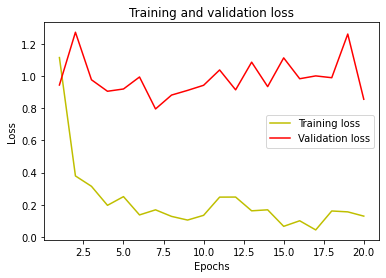

In [9]:
loss = history_of_model.history['loss']
val_loss = history_of_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

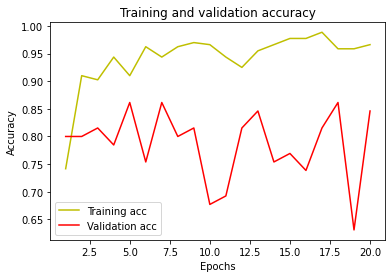

In [10]:
acc = history_of_model.history['accuracy']
val_acc = history_of_model.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

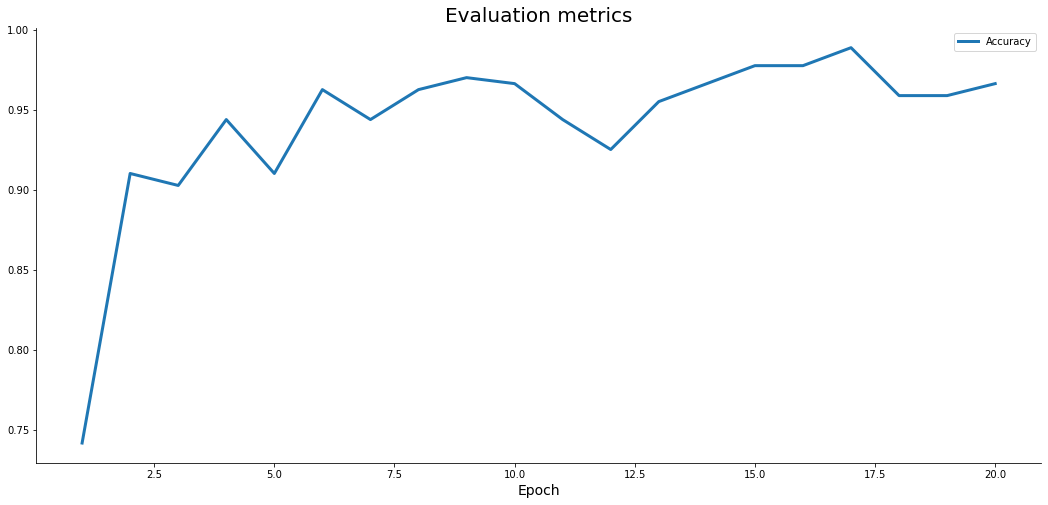

In [11]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 


# plt.plot(
#     np.arange(1, 21), 
#     history_of_model.history['loss'], 
#     label='Loss', lw=3
# )
plt.plot(
    np.arange(1, 21), 
    history_of_model.history['accuracy'], 
    label='Accuracy', lw=3
)
# plt.plot(
#     np.arange(1, 21), 
#     history_of_model.history['lr'], 
#     label='Learning rate', color='#999', lw=3, linestyle='--'
# )
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [45]:
# learning_rates = 1e-3 * (10 ** (np.arange(50) / 30))
# plt.semilogx(
#     learning_rates, 
#     history_of_model.history['loss'], 
#     lw=3, color='#999'
# )
# plt.title('Learning rate vs. loss', size=20)
# plt.xlabel('Learning rate', size=14)
# plt.ylabel('Loss', size=14);